# Biodiversity in National Parks

In this project, we will be inspecting biodiversity data from the National Parks Service.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

This project has two files;

species_info.csv - contains data about different species and their conservation status \
observations.csv - holds recorded sightings of different species at several national parks for the past 7 days. 

species_info.csv:

- category - class of animal
- scientific_name - the scientific name of each species
- common_name - the common names of each species
- conservation_status - each species’ current conservation status


observations.csv:

- scientific_name - the scientific name of each species
- park_name - Park where species were found
- observations - the number of times each species was observed at park

In [2]:
species = pd.read_csv("species_info.csv", encoding='utf-8')
observations = pd.read_csv("observations.csv", encoding='utf-8')

In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


Species data file have 4 columns and 5824 rows. \
Observations data file have 3 columns and 23296 rows.

Now, we will further explore the data.

In [6]:
categories = species.category.unique()
print(f"Categories of species: {categories}")

Categories of species: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [7]:
distinct_species = species.scientific_name.nunique()
print(f"Number of distinct species: {distinct_species}")

Number of distinct species: 5541


In [8]:
conservation_status = species.conservation_status.unique()
print(f"Conservation Statuses: {conservation_status}")

Conservation Statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Now, we will check how many species there are in conservation.

In [9]:
print(species.groupby("conservation_status").size())

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


Next, we move on to the observations data and first, we will see how many parks and how many sighting records there are in the dataframe.

In [10]:
parks = observations.park_name.unique()
print(f"National Parks:{parks}")

National Parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [11]:
num_of_observations = observations.observations.sum()
print(f"Number of observations: {num_of_observations}")

Number of observations: 3314739


We will exclude the species that are not in conservation and plot the distribution of conservation status for animals.

In [12]:
conservation = species[species['conservation_status'].notnull()]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()
conservation

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


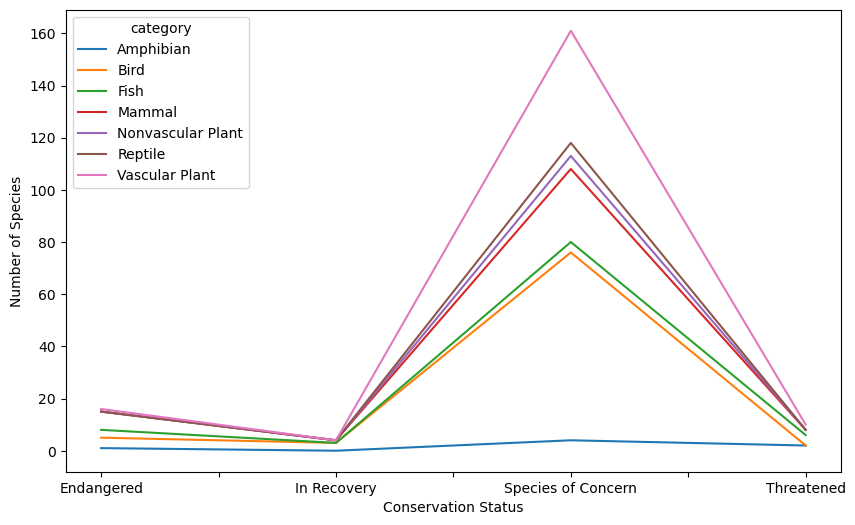

In [13]:
ax = conservation.plot(figsize=(10,6), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

Are certain species more likely to be endangered?

In [14]:
species['is_protected'] = species.conservation_status.notnull()

In [15]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Birds, Vascular Plants and Mammals have a high number of species that are protected which means they are more likely to be endangered. Out of three, Mammals have the highest percentage. So, we will check mammal sightings in the parks.

In [16]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf'],
 ['Common', 'Gray', 'Fox', 'Gray', 'Fox'],
 ['Black', 'Fox', 'Cross', 'Fox', 'Red', 'Fox', 'Silver', 'Fox'],
 ['Red', 'Fox'],
 ['Mountain', 'Lion'],
 ['Wild', 'Cat', 'Wildcat'],
 ['Bobcat'],
 ['Panther', 'Mountain', 'Lion'],
 ['Striped', 'Skunk'],
 ['Eastern', 'Spotted', 'Skunk'],
 ['River', 'Otter'],
 ['Northern', 'River', 'Otter'],
 ['Fisher'],
 ['Mink', 'Or', 'Weasel'],
 ['LongTailed', 'Weasel'],
 ['Least', 'Weasel'],
 ['Mink'],
 ['Common', 'Raccoon', 'Raccoon'],
 ['Black', 'Bear'],
 ['Rafinesques', 'BigEared', 'Bat'],
 ['Big', 'Brown', 'Bat'],
 ['SilverHaired', 'Bat'],
 ['Eastern', 'Red', 'Bat', 'Red', 'Bat'],
 ['Hoary', 

We will clean duplicates and write the items into one list.

In [17]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))

res[:]

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated',
 'Domestic',
 'Sheep',
 'Mouflon',
 'Red',
 'Feral',
 'Wapiti',
 'Or',
 'Elk',
 'WhiteTailed',
 'Deer',
 'Feral',
 'Hog',
 'Wild',
 'Pig',
 'Coyote',
 'Gray',
 'Wolf',
 'Red',
 'Wolf',
 'Common',
 'Gray',
 'Fox',
 'Black',
 'Fox',
 'Cross',
 'Red',
 'Silver',
 'Red',
 'Fox',
 'Mountain',
 'Lion',
 'Wild',
 'Cat',
 'Wildcat',
 'Bobcat',
 'Panther',
 'Mountain',
 'Lion',
 'Striped',
 'Skunk',
 'Eastern',
 'Spotted',
 'Skunk',
 'River',
 'Otter',
 'Northern',
 'River',
 'Otter',
 'Fisher',
 'Mink',
 'Or',
 'Weasel',
 'LongTailed',
 'Weasel',
 'Least',
 'Weasel',
 'Mink',
 'Common',
 'Raccoon',
 'Black',
 'Bear',
 'Rafinesques',
 'BigEared',
 'Bat',
 'Big',
 'Brown',
 'Bat',
 'SilverHaired',
 'Bat',
 'Eastern',
 'Red',
 'Bat',
 'Hoary',
 'Bat',
 'Mississippi',
 'Myotis',
 'Southeastern',
 'Gray',
 'Myotis',
 'Keens',
 'Myotis',
 'Eastern',
 'SmallFooted',
 'Bat',
 'Myoti

Now, we can check the animal with the highest number of sighting.

In [18]:
animal_counted = []

for i in res:
    x = res.count(i)
    animal_counted.append((i,x))

pd.DataFrame(set(animal_counted), columns =['Animal', 'Count']).sort_values("Count", ascending = False).head(10)

,Animal,Count
70,Bat,23
73,Shrew,18
23,Myotis,17
168,Mouse,16
4,Chipmunk,13
129,American,12
147,Squirrel,12
63,Eastern,11
97,Vole,11
48,Western,10


In the data, there are several different scientific names for different types of bats. Next, we will figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [19]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,NaN,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",NaN,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,NaN,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,NaN,False,True


Next the results of the bat species will be merged with `observations` to create a `DataFrame` with observations of bats across the four national parks.  

In [20]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,NaN,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Now, we will observe how many total sightings of bats were occured at each national park.

In [21]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


C:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


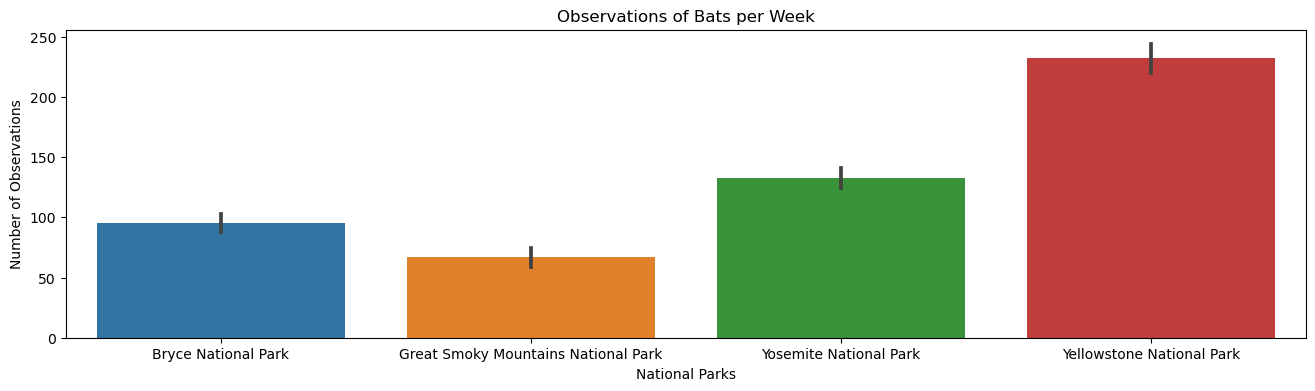

In [22]:
plt.figure(figsize=(16, 4))
sns.barplot(x=bat_observations.park_name, y= bat_observations.observations)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

To summarize our findings;

- The vast majority of species were not part of conservation. (5,633 vs 191)

- Mammals have the highest number of species that are protected and are most likely to be endangered.

- According to our observation, we found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.
